# Numerical Differentiation

In [2]:
#!pip install SymPy
#!pip install numpy

import sympy as smp
import numpy as np
from mpmath import *

#Setting mpmath to have 50 digits of precision
mp.dps = 50

### Euclidean Norm

In this example we shall see that by doing numerical differentiation, the truncation errors will be available. It is not recommended this procedure, unless the user do not know the right equation to model the data. For this example we'll see the derivative of the euclidean norm defined by:
$$f(x) = \sum_{i=1}^{n} x_{i}^{2}$$

And we will calculate the gradients at:
$$x_i = i \quad \text{for} \quad i = 1, 2, \dots, 10$$

In [3]:
def Euclidean2Norm(X):
    return np.sum(np.power(X,2))

Initializing the arrays, in this example a 10-dimension array
   * $n$ = 10
   * $e_1$' = $[1, 0, \dots 0]$
   * $h$ = $\sqrt{2^{-54}}$

In [5]:
X = np.array([a+1 for a in range(10)])
e1 = np.array([0 if a>0 else 1 for a in range(10)])
h = mpf((2**(-54))**(0.5))
print(h)

0.000000007450580596923828125


The first gradient component is defined by
$$\frac{1}{h}\left[ f(x + h e_1) - f(x) \right] = \frac{\partial}{\partial x_1}f(x) + h = 2 x_1 + h = 2 + h$$

In [6]:
#Evaluating the first gradient
from operator import add
a = [x*h for x in e1]
b = list(map(add, a, X))
diff1 = 1/h * (Euclidean2Norm(b) - Euclidean2Norm(X))
print(diff1)

2.000000007450580596923828125


It can be seen that the first gradient component is not equal to 2, this because of the truncated error. As a general rule, **derivatives must not incurr in truncation errors**

## Second example of numeric differentiation

# Symbolic Differentiation

In [7]:
#Libraries
from sympy import *
init_printing()
x = Symbol('x')
y = Symbol('y')
z = Symbol('z')

h = x*y*z
h

In [8]:
limit(h, x, 0)

In [9]:
integrate(h, (x, 0, pi))

In [10]:
integrate(h, (x, 0, 10))

In [11]:
h = 3**x + y**2 - z*sqrt(4)
solve(h, [x,y,z])

In [12]:
h = x**10*y/z

# (func, variable, order)
diff(h, x, 2)

In [13]:
print(h.subs({x:1, y:4, z:10}))
print(h.subs({x:1, y:4, z:10}).evalf())

2/5
0.400000000000000


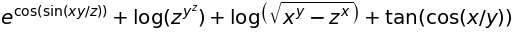

In [14]:
i = Symbol('i')
h = exp(cos(sin(x*y/z)))+log(sqrt(x**y - z**x)) + ln(z**(y**z))+tan(cos(x/y))
h

In [15]:
%%timeit -n10 -r1
hd_x = diff(h,x,1)
hd_y = diff(h,y,1)
hd_z = diff(h,z,1)

hd_x.subs({x:4, y:1, z:1}).evalf()
hd_y.subs({x:4, y:1, z:1}).evalf()
hd_z.subs({x:4, y:1, z:1}).evalf()

20.6 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)


In [16]:
%%timeit -n10 -r1
hd_x = diff(h,x,9)
hd_y = diff(h,y,3)
hd_z = diff(h,z,4)

hd_x.subs({x:4, y:1, z:1}).evalf()
hd_y.subs({x:4, y:1, z:1}).evalf()
hd_z.subs({x:4, y:1, z:1}).evalf()

5.57 s ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)


In [18]:
hd_x = diff(h,x,9)
hd_y = diff(h,y,3)
hd_z = diff(h,z,4)

print(hd_x.subs({x:4, y:1, z:1}).evalf())
print(hd_y.subs({x:4, y:1, z:1}).evalf())
print(hd_z.subs({x:4, y:1, z:1}).evalf())

33355.4720301172
249.438856128440
109.659332144600


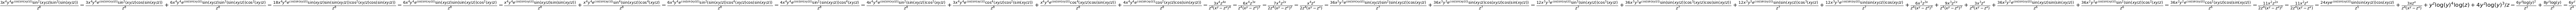

In [20]:
hd_z

# Automatic Differentiation

## Autograd

In [21]:
%reset
#!pip install autograd
import autograd.numpy as np
from autograd import grad
from autograd import elementwise_grad as egrad
from autograd import hessian
from autograd import jacobian

import warnings
warnings.simplefilter('ignore')

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [22]:
def tanh(x):
    y = np.exp(-2.0 * x)
    return (1.0 - y) / (1.0 + y)

grad_tanh = grad(tanh)
grad_tanh(1.0)

In [23]:
test = 1
h = 0.0000000001
(tanh(test+h) - tanh(test))/h

In [24]:
np.exp(-2*test)

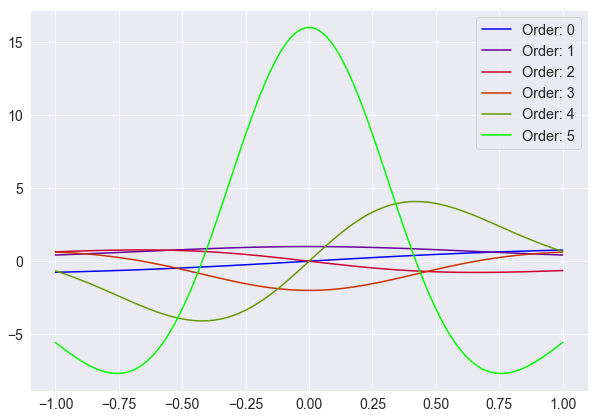

In [25]:
#!pip install matplotlib
#!pip install seaborn
#!pip install pandas
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mp
import seaborn as sns
import pandas as pd
sns.set_style('darkgrid')

x = np.linspace(-1,1,100)
derivatives = [tanh]

grad_tanh=tanh
for i in range(1,6):
    derivatives.append(egrad(grad_tanh))
    grad_tanh = egrad(grad_tanh)

#setting the color Map
colorMap = mp.cm.get_cmap('brg')

fig, ax = plt.subplots(figsize = (10, 7))
legend = []
for i in range(6):
    ax.plot(x, derivatives[i](x), color=colorMap(i/5))
    legend.append('Order: '+str(i-0))
    
ax.legend(legend, fontsize='x-large');
ax.tick_params(axis = 'both', which = 'major', labelsize = 14)

In [27]:
%%timeit -n10 -r1
grad_tanh=tanh
grad_tanh(x)

28.4 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)


In [30]:
def sigmoid(x):
    return 0.5 * (np.tanh(x / 2.) + 1)

def logistic_predictions(weights, inputs):
    # Outputs probability of a label being true according to logistic model.
    return sigmoid(np.dot(inputs, weights))

def training_loss(weights):
    # Training loss is the negative log-likelihood of the training labels.
    preds = logistic_predictions(weights, inputs)
    label_probabilities = preds * targets + (1 - preds) * (1 - targets)
    return -np.sum(np.log(label_probabilities))

# Build a toy dataset.
inputs = np.array([[0.52, 1.12,  0.77],
                   [0.88, -1.08, 0.15],
                   [0.52, 0.06, -1.30],
                   [0.74, -2.49, 1.39]])
targets = np.array([True, True, False, True])

# Define a function that returns gradients of training loss using Autograd.
training_gradient_fun = grad(training_loss)

# Optimize weights using gradient descent.
weights = np.array([0.0, 0.0, 0.0])
cache = np.empty((0,3), float)
for i in range(10000):
    weights -= training_gradient_fun(weights) * 0.1
    cache = np.append(cache, [weights], axis=0)

cache = pd.DataFrame(cache)

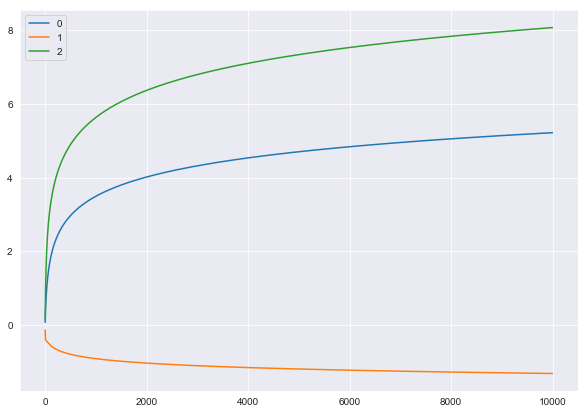

In [31]:
fig, ax = plt.subplots(figsize = (10,7))
ax.plot(cache.index.values, cache);
handles, labels = ax.get_legend_handles_labels()
ax.legend(cache.columns);

In [32]:
def fun(x,y,z):
    w = np.exp(np.cos(np.sin(x*y/z))) + \
    np.log(np.sqrt(np.power(x,y) - np.power(z,x))) + \
    np.log(np.power(z, np.power(y,z)))+\
    np.tan(np.cos(x/y))
    return w
                          
def wrapper(fun, order=1, var=0):
    T = grad(fun, var)
    for i in range(order-1):
        T = grad(T,var)
    return T

In [33]:
%%timeit -n10 -r1
hd_x = wrapper(fun,9,0)
hd_y = wrapper(fun,3,1)
hd_z = wrapper(fun,4,2)

hd_x(4.0,1.0,1.0)
hd_y(4.0,1.0,1.0)
hd_z(4.0,1.0,1.0)

2.88 s ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)


In [34]:
hd_x = wrapper(fun,9,0)
hd_y = wrapper(fun,3,1)
hd_z = wrapper(fun,4,2)

print(hd_x(4.0,1.0,1.0))
print(hd_y(4.0,1.0,1.0))
print(hd_z(4.0,1.0,1.0))

33355.472029985074
249.43885612844014
109.65933214460006


|Symbolic         | Autograd           |
|-----------------|--------------------|
|33355.4720301172 | 33355.472029985074 |
|249.438856128440 | 249.43885612844014 |
|109.659332144600 | 109.65933214460006 |

In [35]:
def fun1(u, v):
    return np.array([np.exp(u*3) + 2*v/u , np.log(u*2) - np.cos(v*u)])

def fun2(u,v):
    return np.exp(u*3) + 2*v/u

F = jacobian(fun1, argnum=0)
H_0 = hessian(fun1, argnum=0)
H_1 = hessian(fun1, argnum=1)

In [37]:
print(H_0(1.0, 1.0))
print(H_1(1.0, 1.0))
print(F(1.0,1.0))

[184.76983231  -0.45969769]
[0.         0.54030231]
[58.25661077  1.84147098]


## AD

In [38]:
%reset
#!pip install ad
import numpy as np 
import ad as ad
from ad.admath import *

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [39]:
adVariable = ad.adnumber(10)
sin(2*adVariable)

ad(0.9129452507276277)

In [40]:
exp(adVariable/2)

ad(148.4131591025766)

In [41]:
adVariable.x

In [42]:
adVariable2 = ad.adnumber(3)
print(adVariable + adVariable2)
print(adVariable ** adVariable2)
print(adVariable / adVariable2)
print(adVariable - adVariable2)
print(adVariable % adVariable2)

ad(13)
ad(1000)
ad(3.3333333333333335)
ad(7)
ad(1)


In [43]:
#Derivatives
#number, tag
u = ad.adnumber(0.1, 'u')
v = ad.adnumber(3.14, 'v')
print(u, v)

ad(0.1, u) ad(3.14, v)


$$sum\_value = u+2*\frac{v}{u}$$

In [44]:
sum_value = u+2*v/u
print(sum_value)
print(sum_value.x)

ad(62.9)
62.9


In [45]:
# -627, 20
sum_value.d()

{ad(0.1, u): -626.9999999999999, ad(3.14, v): 20.0}

In [46]:
sum_value.gradient([u, v])

In [47]:
print(sum_value.hessian([u, v]))

[[12559.999999999998, -199.99999999999997], [-199.99999999999997, 0.0]]


In [48]:
square = u**v
ad.jacobian([square, sum_value], [u, v])

In [49]:
x = ad.adnumber(4)
y = ad.adnumber(1)
z = ad.adnumber(1)
fun = exp(cos(sin(x*y/z)))+log(sqrt(x**y - z**x)) + ln(z**(y**z))+tan(cos(x/y))

In [50]:
%%timeit -n10 -r1
hd_x = fun.d2(x)
hd_y = fun.d2(y)
hd_z = fun.d2(z)

8.66 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)
